In [14]:

import tensorflow 

mnist = tensorflow.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize x_tain and x_test 
x_train = tensorflow.keras.utils.normalize(x_train, axis=1)
x_test = tensorflow.keras.utils.normalize(x_test, axis=1)

# Create model object type is Sequential
model = tensorflow.keras.models.Sequential()

#Add layer to the model
model.add(tensorflow.keras.layers.Flatten()) # input layer, flatten makes 2d array into 1d array
model.add(tensorflow.keras.layers.Dense(128, activation=tensorflow.nn.relu)) # 1st hidden layer, 128 nodes, activation function RELU  
model.add(tensorflow.keras.layers.Dense(128, activation=tensorflow.nn.relu)) # 2nd hidden layer, same as above
model.add(tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.softmax)) # output layer 

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(x_train, y_train, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 1s 611us/step - loss: 0.2607 - accuracy: 0.9243
Epoch 2/3
1875/1875 [==============================] - 1s 612us/step - loss: 0.1038 - accuracy: 0.9687
Epoch 3/3
1875/1875 [==============================] - 1s 621us/step - loss: 0.0716 - accuracy: 0.9772


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 394us/step - loss: 0.0899 - accuracy: 0.9710
0.08986189216375351 0.9710000157356262


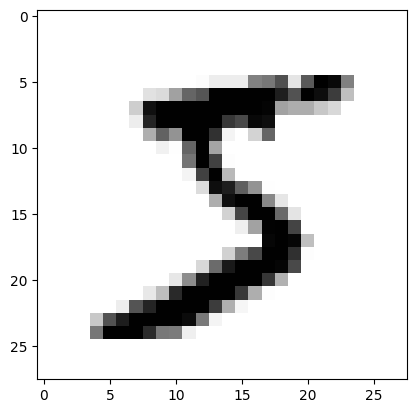

In [9]:
import matplotlib.pyplot as pyplot

pyplot.imshow(x_train[0], cmap = pyplot.cm.binary)

pyplot.show()


In [16]:
model.save('models/mnist_data_model.model')

INFO:tensorflow:Assets written to: mnist_data_model.model/assets


INFO:tensorflow:Assets written to: mnist_data_model.model/assets


In [17]:
new_model = tensorflow.keras.models.load_model('models/mnist_data_model.model')

In [19]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 354us/step


In [20]:
print(predictions)

[[1.92071845e-10 3.57214596e-08 1.47049723e-05 ... 9.99981046e-01
  3.12117554e-09 3.52954828e-07]
 [2.38771247e-09 9.71106238e-06 9.99969482e-01 ... 1.53915503e-09
  1.43504506e-08 4.47637327e-12]
 [5.72185741e-07 9.99484181e-01 4.37543667e-06 ... 9.86049563e-05
  1.04819075e-04 2.22012804e-05]
 ...
 [9.13602420e-08 1.51910626e-05 1.29994802e-07 ... 5.19884015e-05
  1.89684852e-05 2.34341482e-03]
 [9.06478272e-06 4.36346409e-06 1.60638353e-06 ... 1.79389349e-06
  3.79912220e-02 8.87931549e-07]
 [8.23542052e-07 1.97868957e-08 5.26666736e-06 ... 2.54467170e-10
  1.16773592e-07 1.98048689e-08]]


In [26]:
import numpy as np

print(np.argmax(predictions[1]))

2


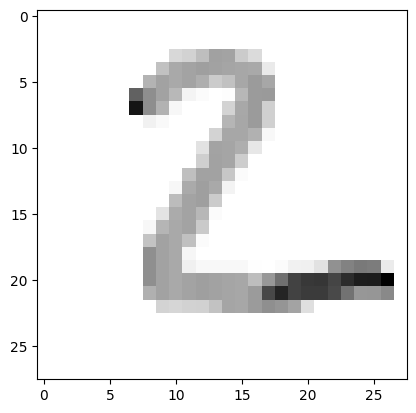

In [27]:
pyplot.imshow(x_test[1], cmap=pyplot.cm.binary)
pyplot.show()